# 1. Importando as Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas_datareader.data as pdr
import yfinance
import numpy as np
import random

yfinance.pdr_override()

# 2. Obtendo Cotações

In [2]:
# cotações das ações
tickers = ['ABEV3.SA', 'ALPA4.SA', 'ALSO3.SA', 'ARZZ3.SA', 'ASAI3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BEEF3.SA', 'BPAC11.SA', 'BRAP4.SA', 'BRFS3.SA', 'BRKM5.SA', 'CCRO3.SA', 'CIEL3.SA', 'CMIG4.SA', 'CMIN3.SA', 'COGN3.SA', 'CPFE3.SA', 'CPLE6.SA', 'CRFB3.SA', 'CSAN3.SA', 'CSNA3.SA', 'CVCB3.SA', 'CYRE3.SA', 'DXCO3.SA', 'EGIE3.SA', 'ELET3.SA', 'ELET6.SA', 'EMBR3.SA', 'ENEV3.SA', 'ENGI11.SA', 'EQTL3.SA', 'EZTC3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GOAU4.SA', 'GOLL4.SA', 'HAPV3.SA', 'HYPE3.SA', 'IGTI11.SA', 'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'KLBN11.SA', 'LREN3.SA', 'LWSA3.SA', 'MGLU3.SA', 'MRFG3.SA', 'MRVE3.SA', 'MULT3.SA', 'NTCO3.SA', 'PCAR3.SA', 'PETR3.SA', 'PETR4.SA', 'PETZ3.SA', 'PRIO3.SA', 'RADL3.SA', 'RAIL3.SA', 'RAIZ4.SA', 'RDOR3.SA', 'RECV3.SA', 'RENT3.SA', 'RRRP3.SA', 'SANB11.SA', 'SBSP3.SA', 'SLCE3.SA', 'SMTO3.SA', 'SOMA3.SA', 'SUZB3.SA', 'TAEE11.SA', 'TIMS3.SA', 'TOTS3.SA', 'UGPA3.SA', 'USIM5.SA', 'VALE3.SA', 'VAMO3.SA', 'VBBR3.SA', 'BHIA3.SA', 'VIVT3.SA', 'WEGE3.SA', 'YDUQ3.SA']

cotacoes = pdr.get_data_yahoo(tickers, period='1y')['Adj Close']

[*********************100%%**********************]  86 of 86 completed


1 Failed download:
['ALSO3.SA']: Exception('%ticker%: No data found, symbol may be delisted')


In [3]:
# obtendo cotação do índice ibovespa

ibov = pdr.get_data_yahoo('^BVSP', period='1y')['Adj Close']

# normalização dos dados do IBOV

ibov = ibov / ibov.iloc[0]

[*********************100%%**********************]  1 of 1 completed


# 3. Explorando as Cotações e Tratando os Dados

In [4]:
cotacoes.head()

,ABEV3.SA,ALPA4.SA,ALSO3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VAMO3.SA,VBBR3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-05-02 00:00:00,13.551657,7.29,NaN,62.082970,11.84,10.77,10.959131,18.465109,11.428039,12.906699,...,13.172281,25.084591,13.883813,6.911618,63.978077,11.117315,11.545507,38.905148,40.058384,7.578352
2023-05-03 00:00:00,13.855762,7.36,NaN,58.654957,11.47,11.30,11.133241,18.407738,11.472726,13.019352,...,13.153613,25.104311,14.088130,6.959951,63.481274,11.088588,11.751512,38.895679,39.155548,7.927674
2023-05-04 00:00:00,13.903277,7.68,NaN,57.780960,11.48,11.33,11.442766,18.615164,11.737556,13.322346,...,13.088264,25.597324,15.751853,6.863285,61.512428,10.322537,12.294608,38.725338,38.566742,8.315809
2023-05-05 00:00:00,13.770231,8.60,NaN,61.461460,10.50,11.63,12.081161,19.087378,12.163171,13.985152,...,12.882885,26.179081,15.926981,7.240282,63.518070,10.916226,12.903252,39.179596,38.488235,8.995048
2023-05-08 00:00:00,13.789239,9.24,NaN,60.752552,11.19,11.72,12.032798,19.012356,12.418541,14.505926,...,13.078929,26.958046,16.277239,7.288615,64.373688,10.904045,13.202892,38.990318,38.468609,9.198819


In [5]:
cotacoes.tail()

,ABEV3.SA,ALPA4.SA,ALSO3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VAMO3.SA,VBBR3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-24 00:00:00,12.04,9.35,NaN,52.240002,13.77,9.59,10.94,27.500000,12.03,13.67,...,17.280001,28.110001,25.610001,8.467940,63.560001,7.00,22.490000,47.670052,38.230000,14.047891
2024-04-25 00:00:00,12.02,9.35,NaN,51.560001,13.31,9.22,10.83,27.379999,12.01,13.66,...,17.420000,27.959999,26.309999,8.206942,62.220001,6.90,22.780001,47.461056,38.669998,14.853434
2024-04-26 00:00:00,12.01,9.41,NaN,52.029999,13.32,9.77,11.22,27.379999,12.20,13.88,...,17.420000,28.080000,26.500000,8.200000,62.220001,7.25,23.590000,47.769569,39.220001,15.295500
2024-04-29 00:00:00,12.10,9.77,NaN,51.889999,13.59,10.03,11.14,27.549999,12.39,14.06,...,17.600000,27.950001,26.440001,8.210000,63.900002,7.45,23.690001,47.699905,39.360001,15.350000
2024-04-30 00:00:00,12.15,9.46,NaN,51.919998,13.12,9.75,10.79,27.420000,12.36,14.00,...,17.610001,27.540001,25.850000,7.910000,63.290001,7.11,23.459999,47.340000,39.549999,14.590000


In [6]:
cotacoes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 2023-05-02 00:00:00 to 2024-04-30 00:00:00
Data columns (total 86 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   250 non-null    float64
 1   ALPA4.SA   250 non-null    float64
 2   ALSO3.SA   0 non-null      float64
 3   ARZZ3.SA   250 non-null    float64
 4   ASAI3.SA   250 non-null    float64
 5   AZUL4.SA   250 non-null    float64
 6   B3SA3.SA   250 non-null    float64
 7   BBAS3.SA   250 non-null    float64
 8   BBDC3.SA   250 non-null    float64
 9   BBDC4.SA   250 non-null    float64
 10  BBSE3.SA   250 non-null    float64
 11  BEEF3.SA   250 non-null    float64
 12  BHIA3.SA   250 non-null    float64
 13  BPAC11.SA  250 non-null    float64
 14  BRAP4.SA   250 non-null    float64
 15  BRFS3.SA   250 non-null    float64
 16  BRKM5.SA   250 non-null    float64
 17  CCRO3.SA   250 non-null    float64
 18  CIEL3.SA   250 non-null    float64
 19  CMIG4.SA   250 non-nu

In [7]:
# número de dados faltantes no df
na = cotacoes.isna().sum().sum()

print(f'O número de dados faltantes do dataframe é: {na}')

O número de dados faltantes do dataframe é: 250


In [8]:
# preenchendo os dados faltantes com cotações dos dias anteriores

cotacoes = cotacoes.ffill()

# verificando se os valores foram preenchidos

na_tratado = cotacoes.isna().sum().sum()

print(f'O número de dados faltantes do dataframe é: {na_tratado}')


O número de dados faltantes do dataframe é: 250


# 4. Calculando os Retornos Diários e Acumulados

In [9]:
# calculando retornos diários

retorno = cotacoes.pct_change()
retorno

,ABEV3.SA,ALPA4.SA,ALSO3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VAMO3.SA,VBBR3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-03,0.022440,0.009602,NaN,-0.055217,-0.031250,0.049211,0.015887,-0.003107,0.003910,0.008728,...,-0.001417,0.000786,0.014716,0.006993,-0.007765,-0.002584,0.017843,-0.000243,-0.022538,0.046095
2023-05-04,0.003429,0.043478,NaN,-0.014901,0.000872,0.002655,0.027802,0.011268,0.023083,0.023273,...,-0.004968,0.019639,0.118094,-0.013889,-0.031015,-0.069085,0.046215,-0.004379,-0.015038,0.048960
2023-05-05,-0.009569,0.119792,NaN,0.063697,-0.085366,0.026478,0.055790,0.025367,0.036261,0.049751,...,-0.015692,0.022727,0.011118,0.054930,0.032605,0.057514,0.049505,0.011730,-0.002036,0.081680
2023-05-08,0.001380,0.074419,NaN,-0.011534,0.065714,0.007739,-0.004003,-0.003930,0.020995,0.037238,...,0.015217,0.029755,0.021991,0.006676,0.013470,-0.001116,0.023222,-0.004831,-0.000510,0.022654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-24,0.015177,0.005376,NaN,-0.000191,0.005110,-0.035211,-0.013526,-0.003623,-0.002488,0.000000,...,0.006407,-0.010560,-0.016135,-0.037363,0.012424,-0.041096,-0.016616,-0.007048,0.006317,0.009174
2024-04-25,-0.001661,0.000000,NaN,-0.013017,-0.033406,-0.038582,-0.010055,-0.004364,-0.001662,-0.000732,...,0.008102,-0.005336,0.027333,-0.030822,-0.021082,-0.014286,0.012895,-0.004384,0.011509,0.057343
2024-04-26,-0.000832,0.006417,NaN,0.009116,0.000751,0.059653,0.036011,0.000000,0.015820,0.016105,...,0.000000,0.004292,0.007222,-0.000846,0.000000,0.050725,0.035557,0.006500,0.014223,0.029762


In [10]:
# calculando retornos acumulados

retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1 # todos os valores da primeira linha começando com 1 
retorno_acumulado

,ABEV3.SA,ALPA4.SA,ALSO3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VAMO3.SA,VBBR3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-05-02,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-05-03,1.022440,1.009602,NaN,0.944783,0.968750,1.049211,1.015887,0.996893,1.003910,1.008728,...,0.998583,1.000786,1.014716,1.006993,0.992235,0.997416,1.017843,0.999757,0.977462,1.046095
2023-05-04,1.025947,1.053498,NaN,0.930705,0.969595,1.051996,1.044131,1.008126,1.027084,1.032204,...,0.993622,1.020440,1.134548,0.993007,0.961461,0.928510,1.064882,0.995378,0.962763,1.097311
2023-05-05,1.016129,1.179698,NaN,0.989989,0.886824,1.079851,1.102383,1.033700,1.064327,1.083558,...,0.978030,1.043632,1.147162,1.047552,0.992810,0.981912,1.117599,1.007054,0.960803,1.186940
2023-05-08,1.017532,1.267490,NaN,0.978570,0.945101,1.088208,1.097970,1.029637,1.086673,1.123907,...,0.992913,1.074685,1.172390,1.054545,1.006184,0.980816,1.143552,1.002189,0.960314,1.213828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-24,0.888452,1.282579,NaN,0.841455,1.163007,0.890436,0.998254,1.489295,1.052674,1.059140,...,1.311846,1.120608,1.844594,1.225175,0.993465,0.629648,1.947944,1.225289,0.954357,1.853687
2024-04-25,0.886976,1.282579,NaN,0.830502,1.124155,0.856082,0.988217,1.482797,1.050924,1.058365,...,1.322474,1.114628,1.895013,1.187413,0.972521,0.620653,1.973062,1.219917,0.965341,1.959982
2024-04-26,0.886239,1.290809,NaN,0.838072,1.125000,0.907149,1.023804,1.482797,1.067550,1.075411,...,1.322474,1.119412,1.908698,1.186408,0.972521,0.652136,2.043219,1.227847,0.979071,2.018315


# 5. Formando os Portifólios Aleatórios

In [11]:
# Nº de ativos em cada carteira é k=
pfolios = random.sample(list(cotacoes.columns) , k=5)

# Valor monetário fictício colocado nas carteiras
pfolios = 10000 * retorno_acumulado.loc[:, pfolios]

# coluna da soma dos saldos das ações na carteira 
pfolios['SALDOS'] = pfolios.sum(axis=1)

# calculo dos retonos diários da valorização da carteira
pfolios['RETORNO'] = pfolios['SALDOS'].pct_change()
pfolios

,VBBR3.SA,GOAU4.SA,BRAP4.SA,ASAI3.SA,RAIZ4.SA,SALDOS,RETORNO
Date,,,,,,,
2023-05-02,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2023-05-03,10178.427968,10097.603296,9942.402650,9687.500101,10361.842632,50267.776646,0.005356
2023-05-04,10648.824393,9760.426253,9579.087673,9695.945434,10460.527946,50144.811700,-0.002446
2023-05-05,11175.993541,10204.080410,9960.125056,8868.243129,10789.475202,50997.917338,0.017013
2023-05-08,11435.523629,10248.446599,10110.766451,9451.013037,10888.158079,52133.907795,0.022275
...,...,...,...,...,...,...,...
2024-04-24,19479.438133,10661.938861,10026.531867,11630.067804,10395.194685,62193.171349,-0.008853
2024-04-25,19730.618877,10550.454096,9931.629782,11241.554264,10429.277258,61883.534277,-0.004979
2024-04-26,20432.190004,10783.557814,9998.061053,11249.999597,10463.359832,62927.168301,0.016864


# 5.1 Plotando Gráfico

Melhor Carteira:
Index(['PETR3.SA', 'SANB11.SA', 'PETR4.SA', 'CPLE6.SA', 'IGTI11.SA'], dtype='object')

Pior Carteira:
Index(['BHIA3.SA', 'BRKM5.SA', 'ALSO3.SA', 'CSNA3.SA', 'EGIE3.SA'], dtype='object')


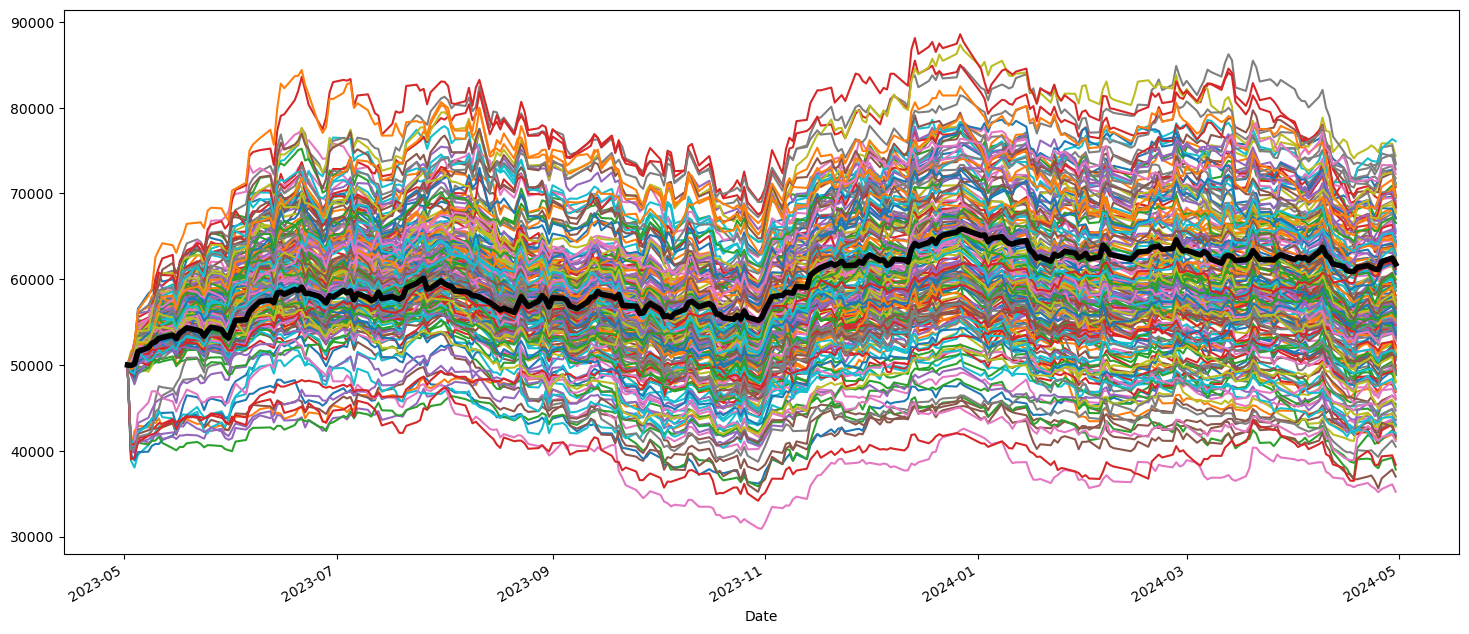

In [12]:
melhor_carteira = None
melhor_saldo = float('-inf')
pior_carteira = None
pior_saldo = float('inf')

for i in range(200):
    pfolios = random.sample(list(cotacoes.columns), k=5)
    pfolios = 10000 * retorno_acumulado.loc[:, pfolios]
    pfolios['SALDOS'] = pfolios.sum(axis=1)
    pfolios['SALDOS'].plot(figsize=(18, 8))
    saldo_final = pfolios['SALDOS'].iloc[-1]

    if saldo_final > melhor_saldo:
        melhor_saldo = saldo_final
        melhor_carteira = pfolios.columns[:-1]

    if saldo_final < pior_saldo:
        pior_saldo = saldo_final
        pior_carteira = pfolios.columns[:-1]

# Agora você pode imprimir ou analisar a melhor e pior carteira
print("Melhor Carteira:")
print(melhor_carteira)

print("\nPior Carteira:")
print(pior_carteira)

(ibov * 50000).plot(linewidth=4, color='black');

